# Assignment 2

Submitted By
Sri Subhash Penneru
Student id - 202292880

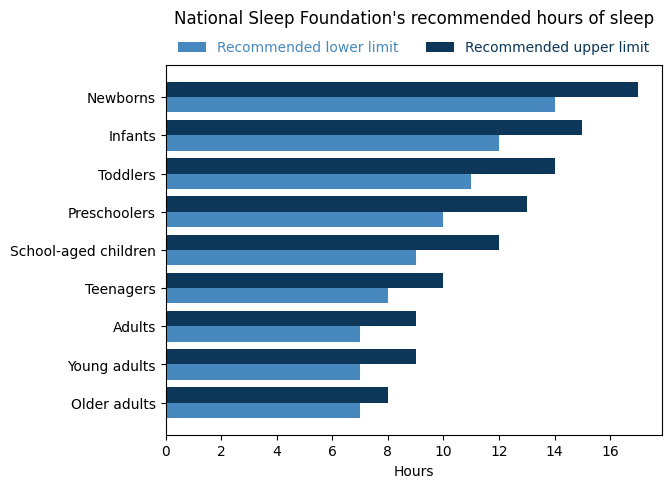

In [2]:
# 1

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the dataset
df = pd.read_csv('sleep.csv')

# Sort the DataFrame by Recommended Upper in descending order
df = df.sort_values(by='Recommended upper')

# Prepare the figure and axis
fig, ax = plt.subplots()

# Constants for the colors according to the image provided
colors = ['#4789be', '#0c3759']  # Blue colors for the bars

# Define the width for the bars
bar_width = 0.4

# Define the positions for the age groups
positions = np.arange(len(df['Age group']))

# Create the barh chart for recommended hours of sleep
# Offset the 'Recommended upper' bar by the width to prevent it from overlapping with 'Recommended lower'
ax.barh(positions - bar_width/2, df['Recommended lower'], height=bar_width, color=colors[0], label='Recommended lower limit')
ax.barh(positions + bar_width/2, df['Recommended upper'], height=bar_width, color=colors[1], label='Recommended upper limit')

# Set the y-ticks to the middle of each 'age group' category
ax.set_yticks(positions)
ax.set_yticklabels(df['Age group'])

# Set the title and labels
ax.set_title("National Sleep Foundation's recommended hours of sleep",pad=30)

# Add a legend below the title and above the graph with colored text
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, labelcolor=colors)

# Remove legend frame
legend.get_frame().set_visible(False)

# Set the xlabel
ax.set_xlabel('Hours')

# Show the plot
plt.show()


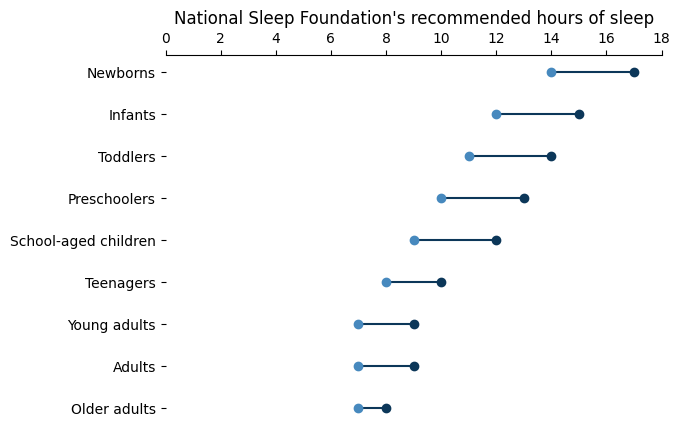

In [3]:
#2 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the dataset
df = pd.read_csv('sleep.csv')

# Sort the DataFrame by Recommended Upper in descending order
df = df.sort_values(by='Recommended upper',ascending=False)

# Prepare the figure and axis
fig, ax = plt.subplots()


# Constants for the colors according to the image provided
dot_colors = ['#4789be', '#0c3759']  # Blue colors for the dots and black for lines

# Plotting the 'Recommended lower' and 'Recommended upper' dots and connecting them with a line
for i, row in df.iterrows():
    # Plot each line segment (age group) with black color
    ax.plot([row['Recommended lower'], row['Recommended upper']], [i, i], 'o-', color=dot_colors[1], markersize=4)

    # Plot dots with alternating blue and darker blue colors
    ax.plot(row['Recommended lower'], i, 'o', color=dot_colors[0], markersize=6)
    ax.plot(row['Recommended upper'], i, 'o', color=dot_colors[1], markersize=6)

# Set the y-ticks to the age groups
ax.set_yticks(np.arange(len(df)))
ax.set_yticklabels(df['Age group'])

ax.invert_yaxis()


# Set the title
ax.set_title("National Sleep Foundation's recommended hours of sleep")

# Remove unwanted spines
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set the x-axis tick marks and labels to be above the plot
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 

# Adjust the x-axis range to start from 0 and end at recommended upper + 1, skipping unused values
max_upper_limit = df['Recommended upper'].max()
ax.set_xlim(0, max_upper_limit + 1)
x_ticks = range(0, max_upper_limit + 2, 2)
ax.set_xticks(x_ticks)
ax.set_xticklabels([str(tick) for tick in x_ticks])


# Show the plot
plt.show()


C:\Users\sri subhash\AppData\Local\Temp\ipykernel_9268\2014165491.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mid age'].fillna(df['Mid age'].mean(), inplace=True)


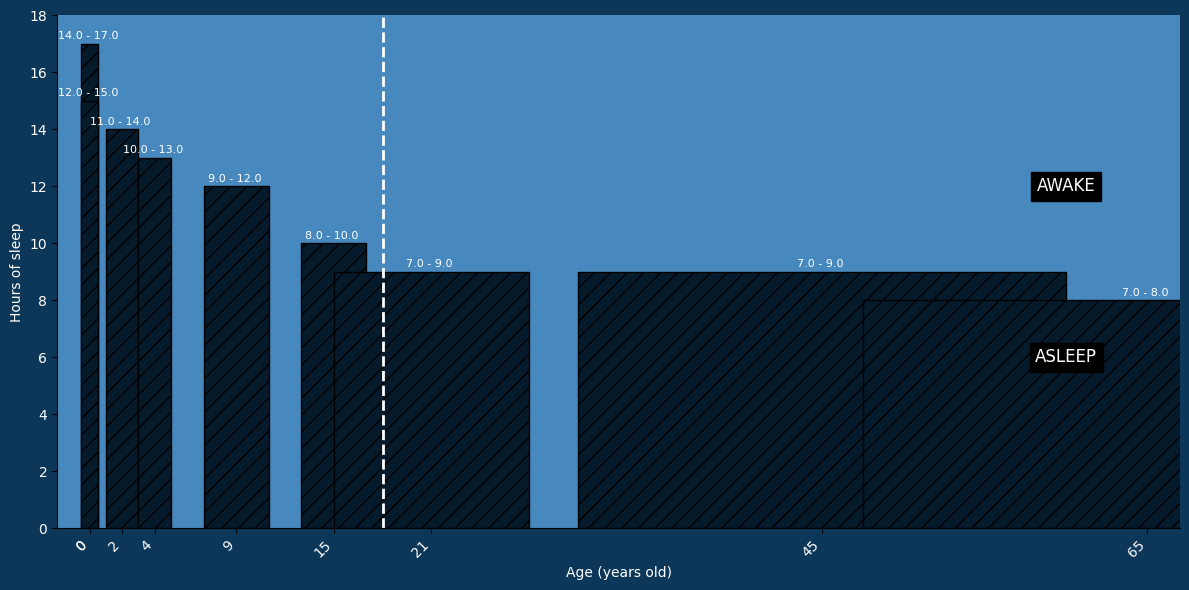

In [44]:
#3 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Read the dataset without modifying it directly
df = pd.read_csv('sleep.csv')

# Sort the DataFrame by the 'Recommended upper' column in descending order
df = df.sort_values(by='Recommended upper', ascending=False)

# Replace NaN values in 'Mid age' with the mean of 'Min age' and 'Max age'
df['Mid age'] = df[['Min age', 'Max age']].mean(axis=1)

# Fill any remaining NaN values with the mean of the entire 'Mid age' column
df['Mid age'].fillna(df['Mid age'].mean(), inplace=True)

# Convert 'Mid age' to integers
df['Mid age'] = df['Mid age'].astype(int)

# Constants for the two blue colors and padding color
bar_color = '#051b2c'  # Blue color for bars
background_color = '#4789be'  # Darker blue color for the rest of the background
text_color = 'white'  # White color for text
padding_color = '#0c3759'  # Light beige color for padding

# Padding around the graph
padding = 2

# Prepare the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Set background color and padding
fig.patch.set_facecolor(padding_color)
ax.set_facecolor(background_color)
ax.set_xlim(df['Mid age'].min() - padding, df['Mid age'].max() + padding)

# Plotting the bars with recommended lower and upper sleep hours
bar_widths = [1, 1, 2, 2, 4, 4, 12, 30, 35]  # Widths based on age range lengths
bars = ax.bar(df['Mid age'], df['Recommended lower'], width=bar_widths, color=bar_color, edgecolor='black')

# Adding diagonal hatching to indicate recommended hours of sleep
for bar, recommended_hours_lower, recommended_hours_upper in zip(bars, df['Recommended lower'], df['Recommended upper']):
    bar.set_hatch('//')  # Adding the hatch
    bar.set_height(recommended_hours_upper)  # Adjusting the height to the recommended upper hours

    # Displaying hours of sleep on top of the bars
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
            f"{recommended_hours_lower:.1f} - {recommended_hours_upper:.1f} ",
            ha='center', va='bottom', color=text_color, fontsize=8)

# Adding a dashed vertical line to denote 18 years of age
ax.axvline(x=18, color=text_color, linestyle='--', linewidth=2)

# Labels for ages and hours of sleep
ax.set_xticks(df['Mid age'])
ax.set_xticklabels(df['Mid age'], rotation=45, ha='right', color=text_color)
ax.set_yticks(np.arange(0, max(df['Recommended upper']) + 2, 2))
ax.set_yticklabels(np.arange(0, max(df['Recommended upper']) + 2, 2), color=text_color)

# Adding labels and title
ax.set_xlabel('Age (years old)', color=text_color)
ax.set_ylabel('Hours of sleep', color=text_color)

# Adding moon and sun icons as well as text for Awake and Asleep

ax.text(60, 12, 'AWAKE', ha='center', va='center', fontsize=12, color=text_color, backgroundcolor='black')
ax.text(60, 6, 'ASLEEP', ha='center', va='center', fontsize=12, color=text_color, backgroundcolor='black')

# Adding arrows on either side of the “Age” label
ax.annotate('', xy=(65, -2), xytext=(70, -2), arrowprops=dict(arrowstyle='<|-', color=text_color))
ax.annotate('', xy=(0, -2), xytext=(-5, -2), arrowprops=dict(arrowstyle='-|>', color=text_color))

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove grids
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Show plot
plt.tight_layout()
plt.show()


Attribution

1. https://matplotlib.org/stable/users/explain/axes/legend_guide.html
2. https://www.scaler.com/topics/matplotlib/matplotlib-set-axis-range/
3. https://python-graph-gallery.com/custom-legend-with-matplotlib/
4. https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.patch
5. https://matplotlib.org/stable/tutorials/intermediate/gridspec.html#adjusting-subplot-parameters
6. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
7. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

    